In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.feature_extraction.text import CountVectorizer

if __name__ == '__main__':
    data_dir = 'data_reviews'
    x_train_df = pd.read_csv(os.path.join(data_dir, 'x_train.csv'))
    y_train_df = pd.read_csv(os.path.join(data_dir, 'y_train.csv'))

In [2]:
#load data into python
x_train_df = pd.read_csv('data_reviews/x_train.csv')
#concatenating review to make string processing easier
tr_list_of_sentences = x_train_df['text'].str.cat(sep='\n')
#tr_list_of_sentences

In [3]:
#interesting model stuff
import sklearn
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import loguniform
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [4]:
y_train_df = pd.read_csv('data_reviews/y_train.csv')
y_tr_N = y_train_df.is_positive_sentiment.values.astype(float)

# Preprocessing

In [5]:
'''
Steps:
1. Remove all non-alpha numeric characters from the string
2. Remove stop words
3. Correct spelling

'''

'\nSteps:\n1. Remove all non-alpha numeric characters from the string\n2. Remove stop words\n3. Correct spelling\n\n'

In [6]:
#remove all non-alpha numeric characters from the string
import re

In [7]:
#using regex to remove non_alphanum
def remove_non_alpha_num(reviews_string):
    s = re.sub(r'[!]', ' ! ', reviews_string)
    s = re.sub(r'[?]', ' ? ', s)
    s = re.sub(r'[.]', ' ', s)
    s = re.sub(r'[^A-Za-z\'\n\s!?]+', '', s)
    s = s.lower()
    return s
               
    
    

In [8]:
#Unit Tests
remove_non_alpha_num("can't.do this")
#remove_non_alpha_num("!?hello *&*^*^")

"can't do this"

In [9]:
#remove stop words
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import wordnet


In [10]:
#stop_words

In [11]:
stop_words = set(stopwords.words('english'))
stop_words = {word.replace("'", '') for word in stop_words}
toRemove = {"not", "couldn't", "shouldn't", "didn't", "doesn't", "don't", "wasn't", "wouldn't", "won't", "again"}
for entry in toRemove:
    stop_words.discard(entry)

In [12]:
#https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
def remove_stop_words(reviews_string, remove_words):
    reviews_list = reviews_string.split('\n')
    filtered_sentences = []
    for review in reviews_list:
        r = review.split()
        filtered_words = [w for w in r if w not in remove_words]
        filtered_sentence = ' '.join(filtered_words)
        filtered_sentences.append(filtered_sentence)
    
    filtered_sentences = '\n'.join(filtered_sentences)
    return filtered_sentences
    

In [13]:

#using the approach from lab
def tokenize_text(raw_text):
    ''' Transform a plain-text string into a list of tokens
    
    We assume that *whitespace* divides tokens.
    
    Args
    ----
    raw_text : string
    
    Returns
    -------
    list_of_tokens : list of strings
        Each element is one token in the provided text
    '''
    list_of_tokens = raw_text.split() # split method divides on whitespace by default
    for pp in range(len(list_of_tokens)):
        cur_token = list_of_tokens[pp]
        # Remove punctuation
        for punc in ['_', '.', ',', '"', '/']:
            cur_token = cur_token.replace(punc, "")
        # Turn to lower case
        clean_token = cur_token.lower()
        # Replace the cleaned token into the original list
        list_of_tokens[pp] = clean_token
    return list_of_tokens

In [14]:
tokenize_text(" ! ")

['!']

In [15]:
from spellchecker import SpellChecker

In [16]:
#correct spelling
#https://pyspellchecker.readthedocs.io/en/latest/
def correct_spelling(reviews_string):
    reviews_list = reviews_string.split('\n')
    correctly_spelled_sentences = []
    
    speller = SpellChecker()
    
    for review in reviews_list:
        words = review.split()
        correctly_spelled_words = [speller.correction(word) if speller.correction(word) is not None else word for word in words]
        correct_sentence = ' '.join(correctly_spelled_words)
        correctly_spelled_sentences.append(correct_sentence)
    
    corrected_reviews_string = '\n'.join(correctly_spelled_sentences)
    return corrected_reviews_string


In [17]:
import nltk
#nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
#nltk.download('wordnet')

In [18]:
nltk.pos_tag(["beautiful"])[0][1][0]

'N'

In [19]:
#https://www.geeksforgeeks.org/part-speech-tagging-stop-words-using-nltk-python/
#nltk.pos_tag(["hello"])[0][1][0].lower()
def get_pos_tag(word):
    word_tag = nltk.pos_tag([word])[0][1][0].lower()
    tag_dict = {"j": wordnet.ADJ, "n": wordnet.NOUN, "v": wordnet.VERB, "r": wordnet.ADV}
    
    return tag_dict.get(word_tag, "n")


In [20]:
def lemmatize_words(reviews_string):
    reviews_list = reviews_string.split('\n')
    wnl = WordNetLemmatizer()
    
    
    lemmatized_text = [" ".join([wnl.lemmatize(word, get_pos_tag(word)) for word in tokenize_text(review)]) for review in reviews_list]
    
    lemmatized_data = "\n".join(lemmatized_text)
    
    return lemmatized_data



In [21]:
#The following code is from the Bag of Words Lab

def create_tok_count(list_of_sentences):
    
    tok_count_dict = dict()

    for line in list_of_sentences:
        tok_list = tokenize_text(line)
        for tok in tok_list:
            if tok in tok_count_dict:
                tok_count_dict[tok] += 1
            else:
                tok_count_dict[tok] = 1
                    
    return tok_count_dict

In [22]:
import afinn

In [23]:

from afinn import Afinn

def determine_sentiment(word):
    afinn = Afinn()
    score = afinn.score(word)
    
    if score > 0:
        return 1  # Positive sentiment
    elif score < 0:
        return -1  # Negative sentiment
    else:
        return 0  # Neutral/Indeterminate sentiment



In [24]:
# Example usage
word = "okay"
result = determine_sentiment(word)
print(result)  # 1 for positive sentiment

0


In [25]:
FREQ_THRESHOLD = 2
def build_vocab_list(reviews_string):
    list_of_sentences = reviews_string.split('\n')
    
    tok_count_dict = create_tok_count(list_of_sentences)
    sorted_tokens = list(sorted(tok_count_dict, key=tok_count_dict.get, reverse=True))
    
    vocab_list = [w for w in sorted_tokens[:] if ((tok_count_dict[w] >= FREQ_THRESHOLD) or (determine_sentiment(w) != 0))]
    #vocab_list = [w for w in sorted_tokens[:] if ((tok_count_dict[w] >= FREQ_THRESHOLD))]
    
    vocab_dict = dict()
    for vocab_id, tok in enumerate(vocab_list):
        vocab_dict[tok] = vocab_id
    
    return vocab_dict, len(list_of_sentences), len(vocab_list)
    

In [26]:

# list_of_sentences = reviews_string.split('\n')
    
# tok_count_dict = create_tok_count(list_of_sentences)
# sorted_tokens = list(sorted(tok_count_dict, key=tok_count_dict.get, reverse=True))

# vocab_list = [w for w in sorted_tokens[:] if tok_count_dict[w] >= FREQ_THRESHOLD]

# vocab_dict = dict()
# for vocab_id, tok in enumerate(vocab_list):
#     vocab_dict[tok] = vocab_id

    

In [27]:
# tok_count_dict[sorted_tokens[0]]
# sorted_tokens[0]

In [28]:
def transform_text_into_feature_vector(text, vocab_dict):
    ''' Produce count feature vector for provided text
    
    Args
    ----
    text : string
        A string of raw text, representing a single 'review'
    vocab_dict : dict with string keys
        If token is in vocabulary, will exist as key in the dict
        If token is not in vocabulary, will not be in the dict

    Returns
    -------
    count_V : 1D numpy array, shape (V,) = (n_vocab,)
        Count vector, indicating how often each vocab word
        appears in the provided text string
    '''
    V = len(vocab_dict.keys())
    count_V = np.zeros(V)
    for tok in tokenize_text(text):
        if tok in vocab_dict:
            vv = vocab_dict[tok]
            count_V[vv] += 1
    return count_V

In [29]:
#DO NOT TOUCH THESE: THEY TAKE A LONG TIME TO RUN

In [30]:
def preprocess_string(tr_list_of_sentences):
    original_review_string = tr_list_of_sentences
    reviews_string = remove_non_alpha_num(tr_list_of_sentences)
    reviews_string = correct_spelling(reviews_string)
    reviews_string = lemmatize_words(reviews_string)
    reviews_string = remove_stop_words(reviews_string, stop_words)
    return reviews_string, original_review_string

In [31]:

reviews_string, original_review_string = preprocess_string(tr_list_of_sentences)

In [189]:

# original_review_string = tr_list_of_sentences
# reviews_string = remove_non_alpha_num(tr_list_of_sentences)
# reviews_string = correct_spelling(reviews_string)
# reviews_string = lemmatize_words(reviews_string)

In [190]:
# reviews_string = remove_stop_words(reviews_string, stop_words)

In [191]:
#original_review_string = tr_list_of_sentences
# reviews_string

In [192]:
#I think I have just improved the text processing. Let's see what models can do for me now

In [65]:
ngram_tuple = (1, 1)

In [66]:

vectorizer = CountVectorizer(ngram_range = ngram_tuple)
X = vectorizer.fit_transform(reviews_string.split("\n"))
x_prepared_NV = X.toarray()

In [67]:
V = x_prepared_NV.shape[1]
V

3620

In [78]:
vocab_dict, N, V = build_vocab_list(reviews_string)
x_prepared_NV = np.zeros((N, V))
for nn, raw_text_line in enumerate(reviews_string.split("\n")):
    x_prepared_NV[nn] = transform_text_into_feature_vector(raw_text_line, vocab_dict)

# Creating Model

In [79]:
model = sklearn.linear_model.LogisticRegression(solver='lbfgs', max_iter=300)
SEED = 2
FOLDS = 15


In [80]:
cRange = loguniform(1e-3, 1e3)
tol = [0, 1e-1,1e-2,1e-3,1e-4,1e-5]

In [81]:
#solver 'lbfgs' does not support an l1 penalty
distributions = {
    'C': cRange,
    'penalty': ['l2']
    #'tol': tol,
    #'fit_intercept': [True, False]
}

In [100]:
curr_search = RandomizedSearchCV(
    estimator = model,
    param_distributions = distributions,
    scoring = 'roc_auc',
    cv = FOLDS,
    return_train_score = True
    
    )

In [101]:
import matplotlib
import matplotlib.pyplot as plt

In [102]:
C_grid = np.logspace(-6, 6, 10)
C_grid

array([1.00000000e-06, 2.15443469e-05, 4.64158883e-04, 1.00000000e-02,
       2.15443469e-01, 4.64158883e+00, 1.00000000e+02, 2.15443469e+03,
       4.64158883e+04, 1.00000000e+06])

In [103]:
#all of a sudden this takes a really long time, which is frustrating

In [104]:
curr_search.fit(x_prepared_NV, y_tr_N)

/Users/liam/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/liam/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

RandomizedSearchCV(cv=15, estimator=LogisticRegression(max_iter=300),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7fb3268076a0>,
                                        'penalty': ['l2']},
                   return_train_score=True, scoring='roc_auc')

In [105]:
#Best score:
#ngrams: 
# (1, 2) 0.90636
# (2, 2) 0.74 (absolute garbage, clearly I need the 1)
# (1, 3) 0.90410 (I am thinking that anything beyond 2 n grams isn't super helpful)

In [106]:
print('Best params:', curr_search.best_params_)
print('Best score:', curr_search.best_score_)
print('Best pipeline:', curr_search.best_estimator_)
print('Index of best pipeline:', curr_search.best_index_)
results=pd.DataFrame(curr_search.cv_results_)
results #see results of test

Best params: {'C': 0.5537145316943337, 'penalty': 'l2'}
Best score: 0.8944479166666668
Best pipeline: LogisticRegression(C=0.5537145316943337, max_iter=300)
Index of best pipeline: 0


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,...,split7_train_score,split8_train_score,split9_train_score,split10_train_score,split11_train_score,split12_train_score,split13_train_score,split14_train_score,mean_train_score,std_train_score
0,0.102324,0.010050,0.001774,0.000167,0.553715,l2,"{'C': 0.5537145316943337, 'penalty': 'l2'}",0.935000,0.960469,0.926406,...,0.976071,0.976789,0.976584,0.976595,0.976163,0.976584,0.976630,0.976128,0.976502,0.000510
1,0.042798,0.001282,0.001692,0.000058,0.039795,l2,"{'C': 0.03979472220431256, 'penalty': 'l2'}",0.898594,0.935000,0.914219,...,0.921891,0.920622,0.922780,0.921857,0.921987,0.922317,0.920411,0.922653,0.921348,0.001473
2,0.699317,0.036652,0.002150,0.000128,710.173359,l2,"{'C': 710.1733588118464, 'penalty': 'l2'}",0.856719,0.870781,0.849687,...,0.999969,0.999980,0.999987,0.999996,0.999990,0.999973,0.999989,0.999992,0.999980,0.000011
3,0.034162,0.001705,0.001834,0.000180,0.010175,l2,"{'C': 0.010175409168846865, 'penalty': 'l2'}",0.865313,0.911875,0.895781,...,0.889653,0.889170,0.891474,0.890958,0.890768,0.890477,0.888681,0.891388,0.889748,0.001767
4,0.030578,0.002617,0.001968,0.000256,0.001251,l2,"{'C': 0.0012509073827598088, 'penalty': 'l2'}",0.841094,0.897188,0.883281,...,0.863583,0.862504,0.864571,0.865920,0.864780,0.863515,0.861513,0.863605,0.862943,0.002087
5,0.037658,0.002717,0.002133,0.000286,0.003075,l2,"{'C': 0.0030750491364945074, 'penalty': 'l2'}",0.846875,0.900000,0.887656,...,0.871006,0.870249,0.872547,0.872916,0.872434,0.871422,0.869453,0.871938,0.870782,0.001987
6,0.046125,0.003062,0.002289,0.000481,0.027071,l2,"{'C': 0.027071178635407974, 'penalty': 'l2'}",0.888906,0.928281,0.907500,...,0.912094,0.911232,0.913536,0.912574,0.912480,0.912731,0.910953,0.913605,0.911881,0.001609
7,0.247425,0.019688,0.002058,0.000348,10.65628,l2,"{'C': 10.656280068735473, 'penalty': 'l2'}",0.910312,0.936406,0.912031,...,0.997226,0.997571,0.997699,0.997933,0.997433,0.997685,0.997781,0.997452,0.997709,0.000323
8,0.094751,0.032928,0.001833,0.000076,0.234503,l2,"{'C': 0.23450318406824378, 'penalty': 'l2'}",0.930313,0.957969,0.925781,...,0.961930,0.961685,0.961702,0.961826,0.961831,0.961982,0.961553,0.961750,0.961676,0.000716
9,0.028814,0.000940,0.001875,0.000232,0.001657,l2,"{'C': 0.0016570004265670825, 'penalty': 'l2'}",0.841719,0.896875,0.884375,...,0.865342,0.864406,0.866605,0.867661,0.866637,0.865483,0.863441,0.865650,0.864857,0.002075


In [107]:
final_model = sklearn.linear_model.LogisticRegression(C=0.5537145316943337, penalty='l2', solver='lbfgs', max_iter=300)

In [108]:
final_model.fit(x_prepared_NV, y_tr_N)

LogisticRegression(C=0.5537145316943337, max_iter=300)

In [792]:
results['param_C']

0      0.526177
1      8.896969
2      0.001676
3      0.538111
4    803.043292
5    196.865769
6      0.018225
7      0.081482
8     64.408414
9    423.831727
Name: param_C, dtype: object

In [793]:
results['mean_test_score']

0    0.894569
1    0.883583
2    0.824417
3    0.894611
4    0.822000
5    0.840958
6    0.852014
7    0.876986
8    0.857444
9    0.830236
Name: mean_test_score, dtype: float64

In [112]:
results['mean_train_score']

0    0.976502
1    0.921348
2    0.999980
3    0.889748
4    0.862943
5    0.870782
6    0.911881
7    0.997709
8    0.961676
9    0.864857
Name: mean_train_score, dtype: float64

(-0.5, 2.5)

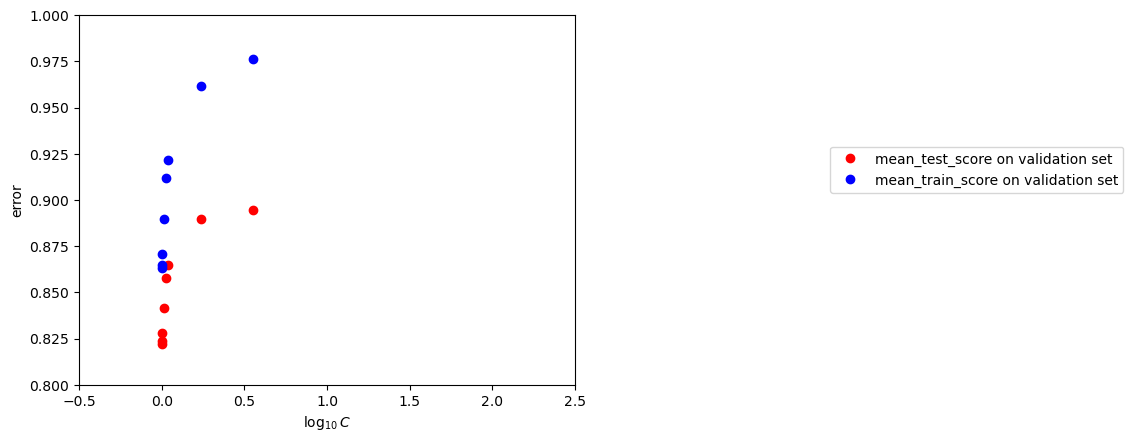

In [123]:
plt.plot(results['param_C'], results['mean_test_score'], 'ro', label='mean_test_score on validation set')
plt.plot(results['param_C'], results['mean_train_score'], 'bo', label='mean_train_score on validation set')

# plt.plot(np.log10(C_grid), tr_err_list, 'b:', label='train err')
# plt.plot(np.log10(C_grid), va_err_list, 'r:', label='valid err')

plt.ylabel('error')
plt.xlabel("$\log_{10} C$");
plt.legend(bbox_to_anchor=(1.5, 0.5)) # make legend outside plot
plt.ylim([0.8, 1.0]);
plt.xlim([-0.5, 2.5])

In [109]:
#getting a leaderboard score:
x_test_df = pd.read_csv('data_reviews/x_test.csv')
test_list_of_sentences = x_test_df['text'].str.cat(sep='\n')

In [110]:
#cleaning test data

In [111]:
test_list_of_sentences, blah = preprocess_string(test_list_of_sentences)

In [48]:
# test_list_of_sentences = remove_non_alpha_num(test_list_of_sentences)

In [49]:
#test_list_of_sentences = correct_spelling(test_list_of_sentences)

In [50]:
# test_list_of_sentences = remove_stop_words(test_list_of_sentences, stop_words)
#

In [51]:
Y = vectorizer.transform(test_list_of_sentences.split("\n"))
#Y.transform(test_list_of_sentences.split("\n")).toarray()


In [52]:
predict_array = Y.toarray()

In [53]:
# predict_array[:, :].shape

In [113]:
#determining test data size
list_of_sentences2 = test_list_of_sentences.split('\n')
Z = len(list_of_sentences2)
x_tr_ZV = np.zeros((Z, V))

In [114]:
for nn2, raw_text_line2 in enumerate(list_of_sentences2):
    x_tr_ZV[nn2] = transform_text_into_feature_vector(raw_text_line2, vocab_dict)

In [115]:
predict_array = x_tr_ZV

In [116]:
yhat_test_N = final_model.predict_proba(predict_array)

In [117]:
np.savetxt("yproba1_test.txt", yhat_test_N[:, 1])

In [265]:
train_predictions = curr_search.predict(x_prepared_NV)
probas = curr_search.predict_proba(x_prepared_NV)
b = ~np.equal(train_predictions, y_tr_N)
indices = np.flatnonzero(b)
print(len(indices))

3


In [266]:
#ok... so it is only getting 4 wrong! This seems really good... not sure how I'm going to improve this

In [267]:
for i in indices:
    print("Butchered Review:")
    print(reviews_string.split("\n")[i])
    #print('\n')
    print("Original Review:")
    print(original_review_string.split("\n")[i])
    #print('\n')
    print("Probability:", probas[i])
    print("Predicted:", train_predictions[i])
    print("Actual:", y_tr_N[i])
    print('\n')
    
    

Butchered Review:
highly recommend
Original Review:
Highly unrecommended.  
Probability: [0.28549099 0.71450901]
Predicted: 1.0
Actual: 0.0


Butchered Review:

Original Review:
10/10  
Probability: [0.54308816 0.45691184]
Predicted: 0.0
Actual: 1.0


Butchered Review:

Original Review:
10/10  
Probability: [0.54308816 0.45691184]
Predicted: 0.0
Actual: 1.0




In [729]:

test_string = "Plan on ordering from them again and again."
#preprocess_string(test_string)
reviews_string3 = test_string

In [730]:
reviews_string3 = remove_non_alpha_num(reviews_string3)
reviews_string3

'plan on ordering from them again and again '

In [731]:
reviews_string3 = correct_spelling(reviews_string3)
reviews_string3

'plan on ordering from them again and again'

In [732]:
reviews_string3 = lemmatize_words(reviews_string3)
reviews_string3

'plan on order from them again and again'

In [734]:
reviews_string3 = remove_stop_words(reviews_string3, stop_words)
reviews_string3

'plan order'